In [1]:
# trdata = ImageDataGenerator()
# tsdata = ImageDataGenerator()

# traindata = trdata.flow_from_directory(directory="../data/dataset/train",target_size=(128,128))
# testdata = tsdata.flow_from_directory(directory="../data/dataset/test", target_size=(128,128))

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

import random
import os
from keras.optimizers import Adam
from keras.layers import Dense
from keras.backend import sigmoid

tf.random.set_seed(51)
np.random.seed(51)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [3]:
print(os.listdir(r"../data/dataset/train"))
Class_Names = os.listdir(r"../data/dataset/test")
# print(os.listdir(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val"))

['NORMAL', 'PNEUMONIA']


In [4]:
train_normal_dir = os.path.join(r"../data/dataset/train/NORMAL")
# val_normal_dir   = os.path.join(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val\NORMAL")
test_normal_dir  = os.path.join(r"../data/dataset/test/NORMAL")

train_pneumonia_dir = os.path.join(r"../data/dataset/train/PNEUMONIA")
# val_pneumonia_dir   = os.path.join(r"C:\Users\Chris\Documents\Flatiron\fourth_projekt\Project-The-Fourth-Pneumonia-X-Ray\data\dataset\chest_xray\val\PNEUMONIA")
test_pneumonia_dir  = os.path.join(r"../data/dataset/train/test/PNEUMONIA")

print('Total training normal images:', len(os.listdir(train_normal_dir)))
print('Total training pneumonia images:', len(os.listdir(train_pneumonia_dir)))

normal_images = os.listdir(train_normal_dir)
print(normal_images[:5])

pneumonia_images = os.listdir(train_pneumonia_dir)
print(pneumonia_images[:5])

Total training normal images: 1103
Total training pneumonia images: 3493
['IM-0115-0001.jpeg', 'IM-0117-0001.jpeg', 'IM-0119-0001.jpeg', 'IM-0122-0001.jpeg', 'IM-0125-0001.jpeg']
['person1000_bacteria_2931.jpeg', 'person1000_virus_1681.jpeg', 'person1001_bacteria_2932.jpeg', 'person1002_bacteria_2933.jpeg', 'person1003_bacteria_2934.jpeg']


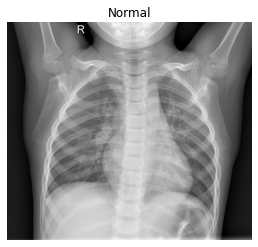

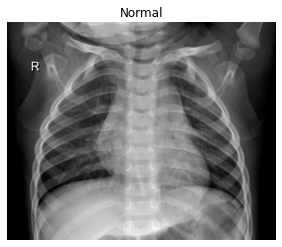

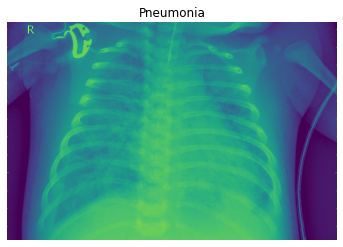

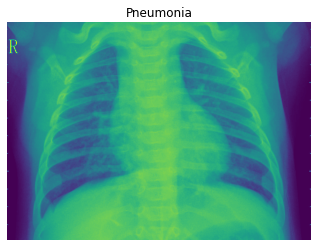

In [5]:
pic_index = 2

next_normal = [os.path.join(train_normal_dir, fname) 
                for fname in normal_images[pic_index-2:pic_index]]
next_pneumonia = [os.path.join(train_pneumonia_dir, fname)
                for fname in pneumonia_images[pic_index-2:pic_index]]

for i, img_path in enumerate(next_normal):
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap = "gray")
    plt.axis('Off')
    plt.title('Normal')
    plt.show()

for i, img_path in enumerate(next_pneumonia):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.title('Pneumonia')
    plt.show()

In [6]:
from keras.applications.resnet50 import preprocess_input

In [19]:
train_dir = r"../data/dataset/train"

training_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rescale = 1/255,
        featurewise_center            = False,  # set input mean to 0 over the dataset
        samplewise_center             = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization  = False,  # divide each input by its std
        zca_whitening                 = False,  # apply ZCA whitening
        rotation_range                = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range                    = 0.2, # Randomly zoom image 
        width_shift_range             = 0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range            = 0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip               = True,  # Randomly flip inputs horizontally.
        vertical_flip                 = False, #Randomly flip inputs vertically
        )
train_generator = training_generator.flow_from_directory(train_dir,target_size = (96,96), batch_size = 32,
                                                       class_mode = 'binary', classes = Class_Names, shuffle=True)

Found 4596 images belonging to 2 classes.


In [20]:
val_dir =  '../data/dataset/val/'

validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = validation_generator.flow_from_directory(val_dir,target_size = (96, 96), batch_size = 32, class_mode='binary', classes = Class_Names)

Found 636 images belonging to 2 classes.


In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), input_shape = (96,96,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0

In [11]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr      = 0.001,
                                                      rho     = 0.90,
                                                      epsilon = 1e-08,
                                                      decay   = 0.0),
              loss    = 'categorical_crossentropy',
              metrics = ['acc'])

Epoch 1/20
144/144 [==============================] - 44s 307ms/step - loss: 4.8320 - acc: 0.7376 - val_loss: 0.3335 - val_acc: 0.8538
Epoch 2/20
144/144 [==============================] - 44s 305ms/step - loss: 0.4260 - acc: 0.8423 - val_loss: 0.2937 - val_acc: 0.8836
Epoch 3/20
144/144 [==============================] - 43s 302ms/step - loss: 0.3848 - acc: 0.8570 - val_loss: 0.2658 - val_acc: 0.9119
Epoch 4/20
144/144 [==============================] - 43s 302ms/step - loss: 0.3804 - acc: 0.8821 - val_loss: 0.3538 - val_acc: 0.8459
Epoch 5/20
144/144 [==============================] - 43s 302ms/step - loss: 0.3189 - acc: 0.8858 - val_loss: 0.2230 - val_acc: 0.9135
Epoch 6/20
144/144 [==============================] - 43s 302ms/step - loss: 0.3186 - acc: 0.9058 - val_loss: 0.2623 - val_acc: 0.8711
Epoch 7/20
144/144 [==============================] - 43s 301ms/step - loss: 0.3150 - acc: 0.9056 - val_loss: 0.2931 - val_acc: 0.8852
Epoch 8/20
144/144 [==============================] - 4

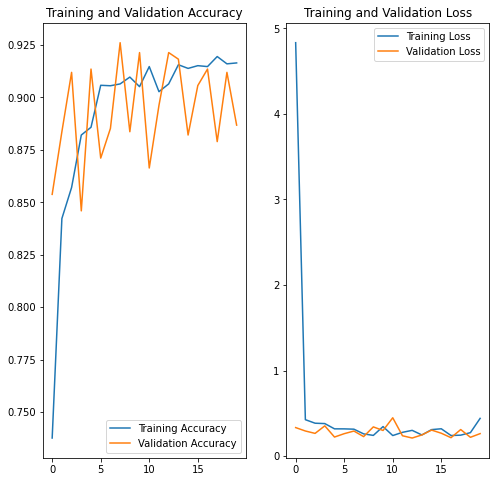

In [13]:
import plotly.express as px

with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
144/144 [==============================] - 45s 316ms/step - loss: 3.8562 - acc: 0.7598 - val_loss: 0.2871 - val_acc: 0.9135
Epoch 2/20
144/144 [==============================] - 45s 311ms/step - loss: 0.4267 - acc: 0.8381 - val_loss: 0.3352 - val_acc: 0.8947
Epoch 3/20
144/144 [==============================] - 45s 313ms/step - loss: 0.3377 - acc: 0.8829 - val_loss: 0.3486 - val_acc: 0.8947
Epoch 4/20
144/144 [==============================] - 45s 311ms/step - loss: 0.2968 - acc: 0.8882 - val_loss: 0.2707 - val_acc: 0.8947
Epoch 5/20
144/144 [==============================] - 45s 311ms/step - loss: 0.2979 - acc: 0.9008 - val_loss: 0.2039 - val_acc: 0.9135
Epoch 6/20
144/144 [==============================] - 45s 313ms/step - loss: 0.2773 - acc: 0.8990 - val_loss: 0.1900 - val_acc: 0.9245
Epoch 7/20
144/144 [==============================] - 45s 311ms/step - loss: 0.2756 - acc: 0.9086 - val_loss: 0.2424 - val_acc: 0.9245
Epoch 8/20
144/144 [==============================] - 4

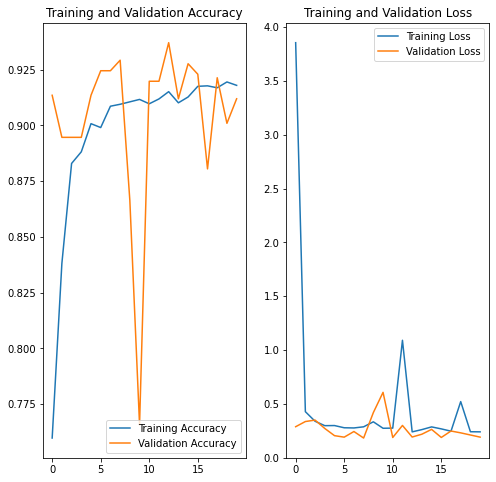

In [21]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(1,activation   = 'sigmoid')  
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr      = 0.001,
                                                      rho     = 0.90,
                                                      epsilon = 1e-08,
                                                      decay   = 0.0),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1,
            )

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
144/144 [==============================] - 45s 311ms/step - loss: 8.3794 - acc: 0.7104 - val_loss: 0.4319 - val_acc: 0.7689
Epoch 2/20
144/144 [==============================] - 44s 307ms/step - loss: 0.3132 - acc: 0.8732 - val_loss: 0.2636 - val_acc: 0.9167
Epoch 3/20
144/144 [==============================] - 44s 308ms/step - loss: 0.2646 - acc: 0.8975 - val_loss: 0.1887 - val_acc: 0.9355
Epoch 4/20
144/144 [==============================] - 44s 308ms/step - loss: 0.2248 - acc: 0.9093 - val_loss: 0.1551 - val_acc: 0.9497
Epoch 5/20
144/144 [==============================] - 44s 307ms/step - loss: 0.2300 - acc: 0.9197 - val_loss: 0.2121 - val_acc: 0.9324
Epoch 6/20
144/144 [==============================] - 45s 310ms/step - loss: 0.2046 - acc: 0.9230 - val_loss: 0.3321 - val_acc: 0.8852
Epoch 7/20
144/144 [==============================] - 44s 307ms/step - loss: 0.2037 - acc: 0.9212 - val_loss: 0.2018 - val_acc: 0.9450
Epoch 8/20
144/144 [==============================] - 4

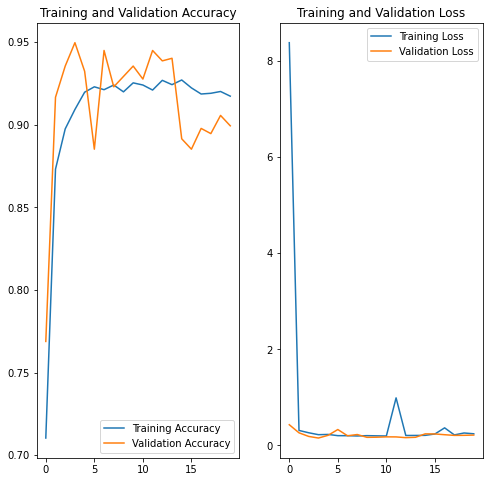

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(1,activation   = 'sigmoid')  
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr      = 0.001,
                                                      rho     = 0.90,
                                                      epsilon = 1e-08,
                                                      decay   = 0.0),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1,
            )

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
def swish(x, b = 1):
    return (x * sigmoid(b * x))

# Four different optimizers

Epoch 1/20
144/144 [==============================] - 44s 307ms/step - loss: 4.5388 - acc: 0.7367 - val_loss: 0.3430 - val_acc: 0.8632
Epoch 2/20
144/144 [==============================] - 44s 305ms/step - loss: 0.3491 - acc: 0.8555 - val_loss: 0.2661 - val_acc: 0.9041
Epoch 3/20
144/144 [==============================] - 44s 305ms/step - loss: 0.2844 - acc: 0.8823 - val_loss: 0.2032 - val_acc: 0.9371
Epoch 4/20
144/144 [==============================] - 44s 305ms/step - loss: 0.2454 - acc: 0.8995 - val_loss: 0.1958 - val_acc: 0.9371
Epoch 5/20
144/144 [==============================] - 44s 304ms/step - loss: 0.2296 - acc: 0.9086 - val_loss: 0.2194 - val_acc: 0.9261
Epoch 6/20
144/144 [==============================] - 44s 304ms/step - loss: 0.2741 - acc: 0.9114 - val_loss: 0.2280 - val_acc: 0.9292
Epoch 7/20
144/144 [==============================] - 44s 306ms/step - loss: 0.2246 - acc: 0.9147 - val_loss: 0.1743 - val_acc: 0.9324
Epoch 8/20
144/144 [==============================] - 4

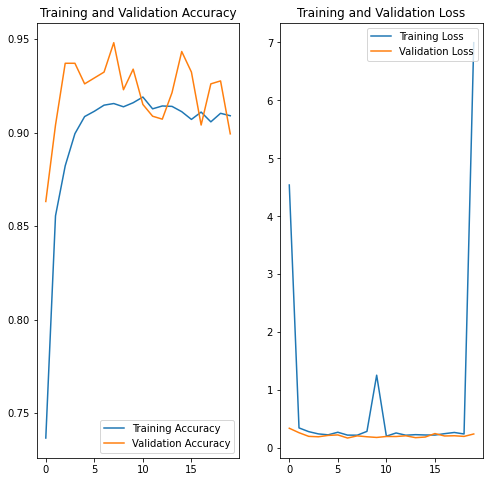

In [19]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr      = 0.001,
                                                      rho     = 0.90,
                                                      epsilon = 1e-08,
                                                      decay   = 0.0),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])


with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
144/144 [==============================] - 48s 331ms/step - loss: 3.0943 - acc: 0.6804 - val_loss: 2.0277 - val_acc: 0.5409
Epoch 2/20
144/144 [==============================] - 46s 317ms/step - loss: 3.0850 - acc: 0.6641 - val_loss: 1.8792 - val_acc: 0.5362
Epoch 3/20
144/144 [==============================] - 46s 321ms/step - loss: 3.1280 - acc: 0.6497 - val_loss: 1.7944 - val_acc: 0.5314
Epoch 4/20
144/144 [==============================] - 47s 328ms/step - loss: 3.0717 - acc: 0.6486 - val_loss: 1.7192 - val_acc: 0.5362
Epoch 5/20
144/144 [==============================] - 50s 346ms/step - loss: 3.0570 - acc: 0.6340 - val_loss: 1.6759 - val_acc: 0.5393
Epoch 6/20
144/144 [==============================] - 50s 349ms/step - loss: 2.9692 - acc: 0.6447 - val_loss: 1.6316 - val_acc: 0.5472
Epoch 7/20
144/144 [==============================] - 51s 352ms/step - loss: 2.9552 - acc: 0.6464 - val_loss: 1.5935 - val_acc: 0.5456
Epoch 8/20
144/144 [==============================] - 5

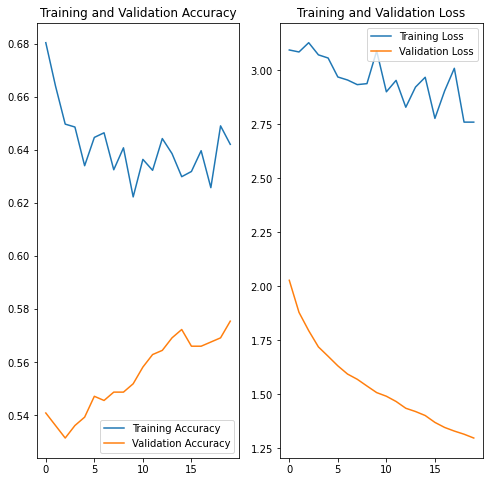

In [20]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])

model.compile(optimizer = tf.keras.optimizers.Adadelta(lr      = 0.0001,
                                                       rho     = 0.95,
                                                       epsilon = 1e-08,
                                                       decay   = 0.0),
              loss    = 'categorical_crossentropy',
              metrics = ['acc'])


with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
144/144 [==============================] - 51s 352ms/step - loss: 1.6852 - acc: 0.7911 - val_loss: 0.3792 - val_acc: 0.8616
Epoch 2/20
144/144 [==============================] - 50s 349ms/step - loss: 0.3430 - acc: 0.8490 - val_loss: 0.3293 - val_acc: 0.8648
Epoch 3/20
144/144 [==============================] - 50s 349ms/step - loss: 0.3173 - acc: 0.8651 - val_loss: 0.2962 - val_acc: 0.8742
Epoch 4/20
144/144 [==============================] - 51s 351ms/step - loss: 0.2839 - acc: 0.8810 - val_loss: 0.2707 - val_acc: 0.8821
Epoch 5/20
144/144 [==============================] - 50s 349ms/step - loss: 0.2762 - acc: 0.8825 - val_loss: 0.3623 - val_acc: 0.8475
Epoch 6/20
144/144 [==============================] - 50s 349ms/step - loss: 0.2608 - acc: 0.8893 - val_loss: 0.3236 - val_acc: 0.8601
Epoch 7/20
144/144 [==============================] - 50s 349ms/step - loss: 0.2658 - acc: 0.8842 - val_loss: 0.2756 - val_acc: 0.8774
Epoch 8/20
144/144 [==============================] - 5

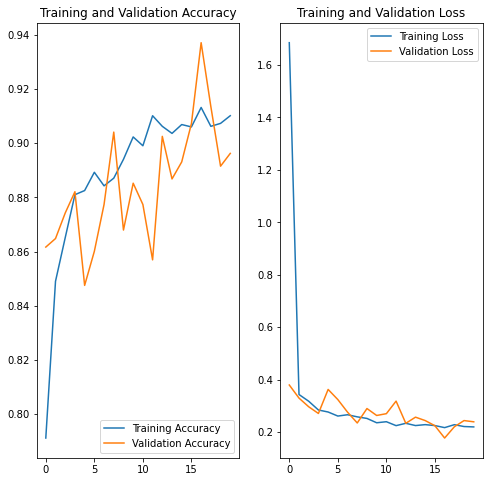

In [21]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])

model.compile(optimizer = tf.keras.optimizers.SGD(lr       = 0.001,
                                                  momentum = 0.01,
                                                  nesterov = True),
              loss    = 'categorical_crossentropy',
              metrics = ['acc'])


with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])

model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                    beta_1  = 0.9,
                                                    beta_2  = 0.999,
                                                    epsilon = 1e-08,
                                                    decay   = 0.0),
              loss    = 'categorical_crossentropy',
              metrics = ['acc'])


with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 20,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Epoch 1/20
144/144 [==============================] - 134s 934ms/step - loss: 1.3144 - acc: 0.7459 - val_loss: 0.3207 - val_acc: 0.8632
Epoch 2/20
144/144 [==============================] - 131s 911ms/step - loss: 0.4042 - acc: 0.8470 - val_loss: 0.2812 - val_acc: 0.8836
Epoch 3/20
144/144 [==============================] - 100s 697ms/step - loss: 0.3471 - acc: 0.8638 - val_loss: 0.2611 - val_acc: 0.8978
Epoch 4/20
144/144 [==============================] - 45s 313ms/step - loss: 0.2808 - acc: 0.8799 - val_loss: 0.2842 - val_acc: 0.8789
Epoch 5/20
144/144 [==============================] - 45s 312ms/step - loss: 0.2459 - acc: 0.8986 - val_loss: 0.2409 - val_acc: 0.9041
Epoch 6/20
144/144 [==============================] - 46s 319ms/step - loss: 0.2414 - acc: 0.9025 - val_loss: 0.2130 - val_acc: 0.9167
Epoch 7/20
122/144 [========================>.....] - ETA: 6s - loss: 0.2226 - acc: 0.9055

KeyboardInterrupt: 

End Four different optimizers

Epoch 1/400
144/144 [==============================] - 53s 371ms/step - loss: 1.5487 - acc: 0.7480 - val_loss: 0.2438 - val_acc: 0.9057
Epoch 2/400
144/144 [==============================] - 53s 367ms/step - loss: 0.4142 - acc: 0.8570 - val_loss: 0.2454 - val_acc: 0.9151
Epoch 3/400
144/144 [==============================] - 52s 361ms/step - loss: 0.3204 - acc: 0.8810 - val_loss: 0.2420 - val_acc: 0.9072
Epoch 4/400
144/144 [==============================] - 52s 361ms/step - loss: 0.2808 - acc: 0.8888 - val_loss: 0.2753 - val_acc: 0.8774
Epoch 5/400
144/144 [==============================] - 47s 325ms/step - loss: 0.2730 - acc: 0.8895 - val_loss: 0.2207 - val_acc: 0.9167
Epoch 6/400
144/144 [==============================] - 46s 323ms/step - loss: 0.2343 - acc: 0.9049 - val_loss: 0.2022 - val_acc: 0.9198
Epoch 7/400
144/144 [==============================] - 47s 323ms/step - loss: 0.2311 - acc: 0.9043 - val_loss: 0.2039 - val_acc: 0.9324
Epoch 8/400
144/144 [===========================

Epoch 61/400
144/144 [==============================] - 47s 323ms/step - loss: 0.0864 - acc: 0.9695 - val_loss: 0.1886 - val_acc: 0.9355
Epoch 62/400
144/144 [==============================] - 47s 324ms/step - loss: 0.0915 - acc: 0.9667 - val_loss: 0.1600 - val_acc: 0.9387
Epoch 63/400
144/144 [==============================] - 47s 323ms/step - loss: 0.0897 - acc: 0.9658 - val_loss: 0.2472 - val_acc: 0.9167
Epoch 64/400
144/144 [==============================] - 47s 324ms/step - loss: 0.0908 - acc: 0.9680 - val_loss: 0.1686 - val_acc: 0.9355
Epoch 65/400
144/144 [==============================] - 47s 324ms/step - loss: 0.0885 - acc: 0.9654 - val_loss: 0.1434 - val_acc: 0.9418
Epoch 66/400
144/144 [==============================] - 47s 323ms/step - loss: 0.0884 - acc: 0.9671 - val_loss: 0.1488 - val_acc: 0.9450
Epoch 67/400
144/144 [==============================] - 46s 322ms/step - loss: 0.0874 - acc: 0.9669 - val_loss: 0.2188 - val_acc: 0.9245
Epoch 68/400
144/144 [===================

144/144 [==============================] - 47s 328ms/step - loss: 0.0435 - acc: 0.9841 - val_loss: 0.2480 - val_acc: 0.9214
Epoch 180/400
144/144 [==============================] - 47s 328ms/step - loss: 0.0450 - acc: 0.9830 - val_loss: 0.1573 - val_acc: 0.9481
Epoch 181/400
144/144 [==============================] - 47s 328ms/step - loss: 0.0356 - acc: 0.9869 - val_loss: 0.1823 - val_acc: 0.9418
Epoch 182/400
144/144 [==============================] - 47s 330ms/step - loss: 0.0450 - acc: 0.9828 - val_loss: 0.1731 - val_acc: 0.9434
Epoch 183/400
144/144 [==============================] - 47s 328ms/step - loss: 0.0494 - acc: 0.9830 - val_loss: 0.1350 - val_acc: 0.9560
Epoch 184/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0452 - acc: 0.9809 - val_loss: 0.1463 - val_acc: 0.9528
Epoch 185/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0417 - acc: 0.9835 - val_loss: 0.1414 - val_acc: 0.9465
Epoch 186/400
144/144 [=========================

144/144 [==============================] - 48s 330ms/step - loss: 0.0284 - acc: 0.9889 - val_loss: 0.2451 - val_acc: 0.9418
Epoch 298/400
144/144 [==============================] - 48s 330ms/step - loss: 0.0280 - acc: 0.9889 - val_loss: 0.1832 - val_acc: 0.9560
Epoch 299/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0260 - acc: 0.9922 - val_loss: 0.2324 - val_acc: 0.9371
Epoch 300/400
144/144 [==============================] - 47s 328ms/step - loss: 0.0218 - acc: 0.9913 - val_loss: 0.3116 - val_acc: 0.9355
Epoch 301/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0363 - acc: 0.9872 - val_loss: 0.2408 - val_acc: 0.9261
Epoch 302/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0228 - acc: 0.9919 - val_loss: 0.2463 - val_acc: 0.9418
Epoch 303/400
144/144 [==============================] - 47s 329ms/step - loss: 0.0234 - acc: 0.9915 - val_loss: 0.2044 - val_acc: 0.9418
Epoch 304/400
144/144 [=========================

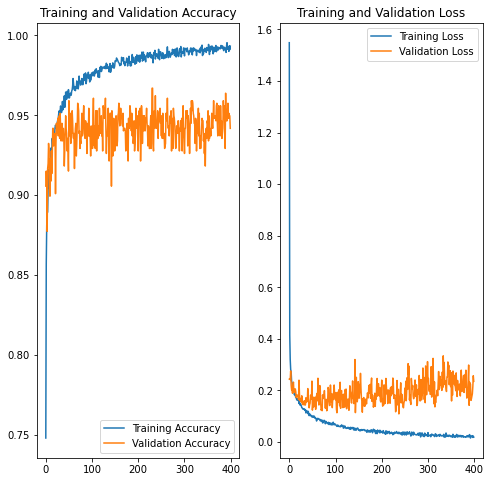

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(96,96,3),activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation = 'swish'),
    tf.keras.layers.MaxPooling2D(2,2),
          
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation = 'swish'),
    tf.keras.layers.Dense(2,activation   = 'softmax')  
])

model.compile(optimizer = tf.keras.optimizers.Nadam(lr      = 0.0001,
                                                    beta_1  = 0.9,
                                                    beta_2  = 0.999,
                                                    epsilon = 1e-08,
                                                    decay   = 0.0),
              loss    = 'categorical_crossentropy',
              metrics = ['acc'])


with tf.device('/device:GPU:0'):
    history = model.fit(train_generator,
            validation_data = val_generator,
            epochs = 400,
            batch_size = 64,
            verbose = 1)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 400
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [17]:
print("Training loss of the model is - " , model.evaluate(train_generator)[0]*100 , "%")
print("Training accuracy of the model is - " , model.evaluate(train_generator)[1]*100 , "%")

 31/144 [=====>........................] - ETA: 1:22 - loss: 0.4343 - acc: 0.7853

KeyboardInterrupt: 

In [ ]:
print("Training loss of the model is - " , model.evaluate(train_generator)[0]*100 , "%")
print("Training accuracy of the model is - " , model.evaluate(train_generator)[1]*100 , "%")

In [ ]:
test_dir = '../data/dataset/test/'
test_generator=ImageDataGenerator(rescale = 1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size = (96,96),batch_size = 32, class_mode = 'categorical', classes = Class_Names)

In [ ]:
test_dir = '../data/dataset/test/'
test_generator=ImageDataGenerator(rescale = 1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size = (96,96),batch_size = 32, class_mode = 'categorical', classes = Class_Names)

In [ ]:
print("Testing loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Testing accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

In [ ]:
print("Testing loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Testing accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

In [ ]:
efficient_net = EfficientNetB3(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False,
    pooling='max'
)

In [ ]:
model = tf.keras.Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['acc'])


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = 5,
    steps_per_epoch = 50,
    validation_data = val_generator,
    validation_steps = 7
)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = 50
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
preds = model.predict_generator(
    test_generator,
    steps=len(test_generator.filenames)
)

In [ ]:
def swish(x, b = 1):
    return (x * sigmoid(b * x))